In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(1)
dataTrain=pd.read_csv('ex3_train.csv')
dataTest=pd.read_csv('ex3_test.csv')

In [3]:
def one_hot_Encoding(Y,classes):
    Yout=np.zeros((Y.shape[0],len(classes)))
    for i in range(0,len(Y)-1):
        indx=classes.index(Y[i])
        Yout[i,indx]=1
    return Yout

In [4]:
def softMax(Yout):
    sumAll=np.sum(Yout)
    return np.divide(Yout,sumAll)

In [5]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [6]:
def layer_sizes(X, Y):
    n_x = X.shape[0] 
    n_h = 25
    n_y = Y.shape[0] 
    return (n_x, n_h, n_y)

In [7]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(234) 
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [8]:
def forward_propagation(X, parameters):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [9]:
def compute_cost(A2, Y, parameters):
    
    m = Y.shape[1] 
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    logprobs = None
    cost = None
    
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),1 - Y)
    cost = -(1 / m) * np.sum(logprobs)
    
    cost = np.squeeze(cost)     
    
    return cost

In [21]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]

    W1 = None
    W2 = None
    W1 = parameters["W1"]
    W2 = parameters["W2"]

    A1 = None
    A2 = None
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2= None
    dW2 = None
    db2 = None
    dZ1 = None
    dW1 = None
    db1 = None
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2,A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T,dZ2) * (A1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1,X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
    

    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [22]:
def gradientDescendent(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [23]:
def model(X, Y, n_h, learning_rate,cost_matrix,num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = None
    W1 = None
    b1 = None
    W2 = None
    b2 = None
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        cost_matrix.append(cost)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradientDescendent(parameters, grads,learning_rate)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters,cost_matrix

In [24]:
def predict(parameters,X):
    A2, cache = forward_propagation(X, parameters)
    predictedClass=[]
    classes=np.array([0,1,2,3,4,5,6,7,8,9])
    for i in range(0,X.shape[1]):
        P=softMax(A2[:,i])
        pMax=max(P) 
        index = np.where(np.in1d(P, pMax))[0]
        pred=classes[index]
        predictedClass.append(pred[0])
    return predictedClass

In [25]:
def Accuracy(X,H,parameters):
    Out=predict(parameters,X)
    countTP=0
    for i in range(len(Out)):
        if Out[i]==H[i]:
            countTP=countTP+1
    return (countTP/len(Out))*100

In [26]:
H=np.array(dataTrain['y'])
classes=[0,1,2,3,4,5,6,7,8,9]
Y=one_hot_Encoding(H,classes)
Input_train=np.array(dataTrain)
X=Input_train[:,0:400]
X=X.T
Y=Y.T
Input_test=np.array(dataTest)
Htest=np.array(dataTest['y'])
Xtest=Input_test[:,0:400]
Xtest=Xtest.T

In [27]:
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]

In [28]:
cost_matrix=[]
parameters,cost_matrix=model(X, Y, 25, 0.01,cost_matrix,10000, True)

Cost after iteration 0: 6.903977
Cost after iteration 1000: 3.251991
Cost after iteration 2000: 3.245442
Cost after iteration 3000: 3.219215
Cost after iteration 4000: 3.110269
Cost after iteration 5000: 2.828244
Cost after iteration 6000: 2.471579
Cost after iteration 7000: 2.178371
Cost after iteration 8000: 1.957607
Cost after iteration 9000: 1.780883


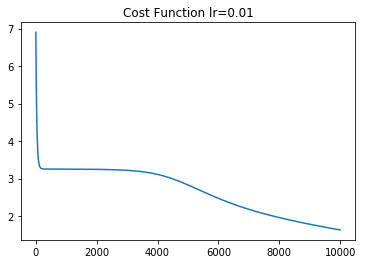

Training Accuracy for 0.01 lr is : 78.94285714285715
Testing Accuracy for 0.01 lr is : 77.13333333333333


In [29]:
plt.plot(cost_matrix)
plt.title("Cost Function lr=0.01")
plt.show()
TrainAcc=Accuracy(X,H,parameters)
TestAcc=Accuracy(Xtest,Htest,parameters)
print("Training Accuracy for 0.01 lr is :",TrainAcc)
print("Testing Accuracy for 0.01 lr is :",TestAcc)

Cost after iteration 0: 6.903977
Cost after iteration 1000: 1.626650
Cost after iteration 2000: 0.901620
Cost after iteration 3000: 0.670004
Cost after iteration 4000: 0.554979
Cost after iteration 5000: 0.482361
Cost after iteration 6000: 0.429510
Cost after iteration 7000: 0.388194
Cost after iteration 8000: 0.354418
Cost after iteration 9000: 0.325985


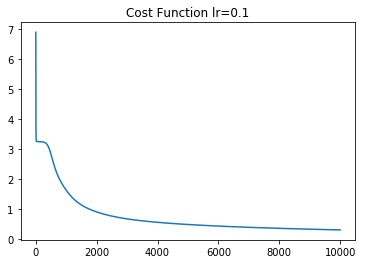

Training Accuracy for 0.1 lr is : 96.45714285714286
Testing Accuracy for 0.1 lr is : 93.0


In [30]:
cost_matrix1=[]
parameters,cost_matrix1=model(X, Y, 25, 0.1,cost_matrix1,10000, True)
plt.plot(cost_matrix1)
plt.title("Cost Function lr=0.1")
plt.show()
TrainAcc=Accuracy(X,H,parameters)
TestAcc=Accuracy(Xtest,Htest,parameters)
print("Training Accuracy for 0.1 lr is :",TrainAcc)
print("Testing Accuracy for 0.1 lr is :",TestAcc)

In [ ]:
cost_matrix2=[]
parameters,cost_matrix2=model(X, Y, 25, 1,cost_matrix2,10000, True)
plt.plot(cost_matrix2)
plt.title("Cost Function lr=1(OVERFITTED)")
plt.show()
TrainAcc=Accuracy(X,H,parameters)
TestAcc=Accuracy(Xtest,Htest,parameters)
print("Training Accuracy for 1 lr is :",TrainAcc)
print("Testing Accuracy for 1 lr is :",TestAcc)

Cost after iteration 0: 6.903977
Cost after iteration 1000: 0.305281
Cost after iteration 2000: 0.169560
Cost after iteration 3000: 0.107784
Cost after iteration 4000: 0.075615
Cost after iteration 5000: 0.056919
